## Name(s):

## Jorge Hernandez
## Patrick Klingler

# Assignment 2: Intro to Clustering

In this assignment we'll be looking at three popular types of clustering algorithms -- K-Means clustering, Hierarchical clustering and Density Based clustering. We'll also look at some measures of cluster quality like cohesion, separation and silhoutte coefficient.

## Part 1: K Means Clustering

In k means clustering you are given a dataset and a hyperparameter k specifying the number of desired of output clusters. The basic idea of k means is to minimize the sum of squared error (SSE) of the output clusters. Unfortunately, the solution to this problem is NP Hard. In this assignment we'll be implementing the iterative algorithm that produces the locally optimal solution to this problem but, guarantees convergence.

In [5]:
# Some headers
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy.random import randint
from numpy import square, sqrt
import seaborn as sns
sns.set()

In [6]:
# Enable inline mode for matplotlib so that IPython displays graphs.
%matplotlib inline

In [7]:
# get data from text file
data = np.genfromtxt("data.csv", delimiter=",")


In [8]:
data_pd = pd.read_csv("data.csv", header=None)
data_pd.head()

,0,1
0,-0.731698,-0.874311
1,-0.547702,-0.580320
2,-0.762840,-0.885572
3,-0.340946,-0.810411
4,-0.749065,-0.399218


In [9]:
np.__version__

'1.12.1'

In [10]:
def euclid_distance(point, point2):
    dist = 0
    for p, p2 in zip(point, point2):
        dist += (p - p2)**2
    return dist**.5
def distance_matrix(data, data2):
    matrix = []
    for point in data:
        matrix.append([euclid_distance(point, point2)  for point2 in data2])
    return matrix

Q1. Implement the function `generateClusters` that returns clusters, given the cluster centroids (`mu`) and the dataset (`data`). Each datapoint needs to be associated to the closest cluster centroid.

In [11]:
def generateClusters(data, mu):
    # your code goes here
    distances = distance_matrix(data, mu) # Manhattan distance
    clusters = [[] for _ in mu]
    for data_point, dist in zip(data, distances):
        clusters[np.argmin(dist)].append(data_point)
    return clusters

#clusters = generateClusters(data, data[randint(0, len(data), 3)])

Q2. Implement the function `recompute_centroids` that returns the centroids given a set of input clusters. Hint: you need to calculate the mean for each cluster.

In [12]:
def recompute_centroids(clusters):
    new_centroids = []
    # slow way of getting the meanc coords
    # but explicitly shows what is the goal
    for cluster in clusters:
        # a cluster will be a list of coordinates and we 
        # want to calculate the mean for every dimension
        entries = len(cluster)
        if entries == 0:
            continue
        x = 0
        y = 0
        for coord in cluster:
            x += coord[0]
            y += coord[1]
        new_centroids.append([x/entries, y/entries])
    return new_centroids

Q3. Implement the function `checkConvergence` that checks if the termination condition of k means algorithm has reached, i.e. the previous centroids are the same as the new centroids. 

In [13]:
def checkConvergence(mu, previous_mu):
    # your code goes here
    if previous_mu == None:
        # have not converged
        return False
    return mu == previous_mu

Q4. Implement the function `kMeansClustering` that returns k clusters along with their centroids given the input dataset and the desired number of clusters (`k`).

In [14]:
def kMeansClustering(data, k):
    rand_centroids = data[randint(0, len(data), k)]
    clusters = generateClusters(data, rand_centroids)
    mu = recompute_centroids(clusters)
    previous_mu = None
    
    while not checkConvergence(mu, previous_mu):
        clusters = generateClusters(data, mu)
        previous_mu = mu
        mu = recompute_centroids(clusters)
    
    clusters_n = []
    for cl in clusters:
        x_list = []
        y_list = []
        for coord in cl:
            x_list.append(coord[0])
            y_list.append(coord[1])
        clusters_n.append([x_list, y_list])
        
    return(mu, clusters_n)

Q5. Cluster the data present in `data.csv` using `kMeansClustering` with `k = 5`. Display the clusters using `plt.scatter`, make sure to mark different clusters with a different color. Also calculate the average cohesion and separation for the generated clusters.

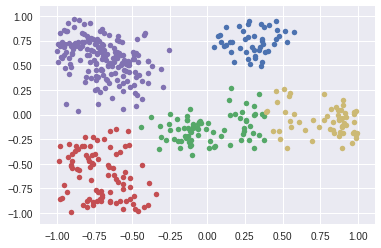

In [24]:
# your code goes here
mu, clusters = kMeansClustering(data, 5)
colors = sns.color_palette()
for i, cl in enumerate(clusters):
    plt.scatter(cl[0], cl[1], c=colors[i], lw=0, s=30)
plt.show()

Q. (Extra Credit) Implement kMeans++, to initialise the centroids in the k Means algorithm. Does this improve performance? Give cohesion and spearation values.

In [9]:
# your code goes here


## Part 2: Hierarchical Clustering

For this part you'll be implementing single-linkage clustering, one of several methods of hierarchical clustering. It is based on grouping clusters in bottom-up fashion (agglomerative clustering), at each step combining two clusters that contain the closest pair of elements not yet belonging to the same cluster as each other. In the beginning of the agglomerative clustering process, each element is in a cluster of its own. The clusters are then sequentially combined into larger clusters, until all elements end up being in the same cluster. At each step, the two clusters separated by the shortest distance are combined. Here distance is defined as the euclidean distance between the two points.

In [25]:
# get data from text file
data = np.genfromtxt("data2.csv", delimiter=",")

Q6. Implement single-linkage clustering. Print the cophenetic correlation coefficient (CPCC) for the resultant clustering.

In [26]:
# your code goes here
clusters = data.copy()
proximity_mat = pd.DataFrame(distance_matrix(clusters, clusters))
#proximity_mat = pd.DataFrame(np.triu(proximity_mat))
proximity_mat
# may or may not want to do this????
# proximity_mat.index = proximity_mat.index.map(str)
# proximity_mat.columns = proximity_mat.columns.astype(str)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.167074,0.437839,0.240195,0.300417,0.188154,0.136595,0.920262,0.729939,0.652120,0.970634,0.635743,0.703489,0.805269,1.703425,1.540956,1.627469,1.651072,1.535888,1.586703
1,0.167074,0.000000,0.337816,0.100249,0.176018,0.076624,0.132774,0.782696,0.565505,0.485104,0.803849,0.470100,0.543545,0.638217,1.537135,1.376485,1.470859,1.491681,1.369966,1.442648
2,0.437839,0.337816,0.000000,0.239715,0.455586,0.406139,0.468774,0.501389,0.581576,0.443087,0.743833,0.490188,0.385481,0.569804,1.455092,1.327440,1.482427,1.484515,1.299983,1.515487
3,0.240195,0.100249,0.239715,0.000000,0.232553,0.166554,0.233010,0.686891,0.531842,0.430952,0.754916,0.433287,0.464684,0.583206,1.489168,1.336612,1.448848,1.464313,1.324340,1.439112
4,0.300417,0.176018,0.455586,0.232553,0.000000,0.114756,0.179589,0.819098,0.461462,0.423929,0.714956,0.378836,0.532229,0.567465,1.435328,1.263179,1.333070,1.360271,1.265717,1.286327
5,0.188154,0.076624,0.406139,0.166554,0.114756,0.000000,0.090139,0.828282,0.550375,0.488636,0.797713,0.459838,0.568908,0.639371,1.526405,1.359534,1.440013,1.464699,1.357762,1.399325
6,0.136595,0.132774,0.468774,0.233010,0.179589,0.090139,0.000000,0.911698,0.634460,0.578015,0.884264,0.546180,0.658332,0.728072,1.610404,1.440793,1.512434,1.539858,1.441271,1.460736
7,0.920262,0.782696,0.501389,0.686891,0.819098,0.828282,0.911698,0.000000,0.597986,0.484599,0.563823,0.573024,0.319740,0.469680,1.112336,1.040725,1.266438,1.241655,0.986888,1.385895
8,0.729939,0.565505,0.581576,0.531842,0.461462,0.550375,0.634460,0.597986,0.000000,0.145898,0.255811,0.098835,0.295107,0.150992,0.976130,0.811093,0.918901,0.932523,0.807388,0.934037
9,0.652120,0.485104,0.443087,0.430952,0.423929,0.488636,0.578015,0.484599,0.145898,0.000000,0.324222,0.088506,0.166252,0.153265,1.058227,0.908871,1.042818,1.049564,0.893811,1.074117


In [32]:
for col in proximity_mat.columns:
    print(str(col))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [82]:
def find_min_dist(distances):
    min_dist = 10
    min_index = None
    num_rows = distances.shape[0]
    j = 0
    for i, distance_arr in distances.iterrows():
        if j + 1 >= num_rows:
            break
        min_idx = distance_arr[j+1:].argmin()
        if distance_arr[min_idx] < min_dist:
            min_dist = distance_arr[min_idx]
            min_index = (distances.index[j], min_idx)
        j += 1
    return min_index, min_dist

while(len(clusters) > 1):
    min_idx, min_dist = find_min_dist(proximity_mat)
    print(min_idx)
    row, col = min_idx[0], min_idx[1]
    break
    
#     break
#     pass
idx = [str(i) for i in range(20)]
proximity_mat.columns = idx
idx.remove("5")
idx.remove("1")
idx.append("1 5")
proximity_mat.loc["1 5"] = 0
proximity_mat["1 5"] = 0

('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')

('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')
('1', '1 5')

KeyboardInterrupt: 

In [77]:
proximity_mat.index()[index]

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '1 5'],
      dtype='object')

In [62]:
proximity_mat.columns.tolist()

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1 5']

In [68]:
proximity_mat.index = idx

In [69]:
points = proximity_mat.columns.tolist()
cluster = "1 5"
new_cluster_dists = [min(proximity_mat[cls_point][point] for cls_point in cluster.split()) for point in points[:-1]]
proximity_mat["1 5"] = new_cluster_dists

[0.16707388152600289,
 0.0,
 0.33781622661248556,
 0.10024869501414092,
 0.11475610658682694,
 0.0,
 0.090139317220562523,
 0.78269559305912639,
 0.55037475159791016,
 0.48510350573007222,
 0.79771285860921071,
 0.45983805544335032,
 0.54354498525131756,
 0.63821662752897912,
 1.5264046306133803,
 1.3595340153986748,
 1.4400133915460898,
 1.4646986706760807,
 1.3577621301762908,
 1.3993246476341736]

In [71]:
new_cluster_dists.append(0)
proximity_mat["1 5"] = new_cluster_dists

In [74]:
idx.remove('1')
idx.remove('5')

In [76]:
proximity_mat.loc[idx, idx]

,0,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,1 5
0,0.000000,0.437839,0.240195,0.300417,0.136595,0.920262,0.729939,0.652120,0.970634,0.635743,0.703489,0.805269,1.703425,1.540956,1.627469,1.651072,1.535888,1.586703,0.167074
2,0.437839,0.000000,0.239715,0.455586,0.468774,0.501389,0.581576,0.443087,0.743833,0.490188,0.385481,0.569804,1.455092,1.327440,1.482427,1.484515,1.299983,1.515487,0.337816
3,0.240195,0.239715,0.000000,0.232553,0.233010,0.686891,0.531842,0.430952,0.754916,0.433287,0.464684,0.583206,1.489168,1.336612,1.448848,1.464313,1.324340,1.439112,0.100249
4,0.300417,0.455586,0.232553,0.000000,0.179589,0.819098,0.461462,0.423929,0.714956,0.378836,0.532229,0.567465,1.435328,1.263179,1.333070,1.360271,1.265717,1.286327,0.114756
6,0.136595,0.468774,0.233010,0.179589,0.000000,0.911698,0.634460,0.578015,0.884264,0.546180,0.658332,0.728072,1.610404,1.440793,1.512434,1.539858,1.441271,1.460736,0.090139
7,0.920262,0.501389,0.686891,0.819098,0.911698,0.000000,0.597986,0.484599,0.563823,0.573024,0.319740,0.469680,1.112336,1.040725,1.266438,1.241655,0.986888,1.385895,0.782696
8,0.729939,0.581576,0.531842,0.461462,0.634460,0.597986,0.000000,0.145898,0.255811,0.098835,0.295107,0.150992,0.976130,0.811093,0.918901,0.932523,0.807388,0.934037,0.550375
9,0.652120,0.443087,0.430952,0.423929,0.578015,0.484599,0.145898,0.000000,0.324222,0.088506,0.166252,0.153265,1.058227,0.908871,1.042818,1.049564,0.893811,1.074117,0.485104
10,0.970634,0.743833,0.754916,0.714956,0.884264,0.563823,0.255811,0.324222,0.000000,0.338087,0.369478,0.175927,0.734467,0.586941,0.746978,0.742571,0.569590,0.828665,0.797713
11,0.635743,0.490188,0.433287,0.378836,0.546180,0.573024,0.098835,0.088506,0.338087,0.000000,0.254660,0.192303,1.067895,0.906814,1.017670,1.031244,0.900147,1.028028,0.459838


## Part 3: Density Based Clustering (DBSCAN)

For this part we'll be implementing DBSCAN, one of the most popular density based clustering algorithms.

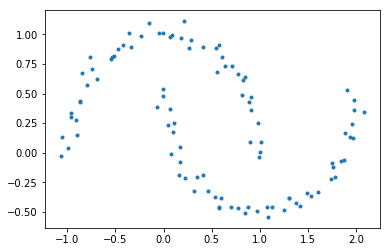

In [12]:
# get data from text file
data = np.genfromtxt("data3.csv", delimiter=",")
plt.scatter(data[:,0],data[:,1], marker='.')

Q7. Run your `kMeansClustering` with `k = 2` and display the output clusters (make sure that different clusters are marked with different colors). Also display the cohesion and separation values for the clusters. What do you observe?

In [13]:
# your code goes here


Q8. Implement the DBSCAN algorithm and display output clusters. DBSCAN requires two parameters: epsilon and the minimum number of points required to form a dense region (minPts). A good starting point for epsilon is `0.3` and `minPts = 2`. You should tweak these values and observe how the resultant clusters change.

In [14]:
# your code goes here


Q9. Display the separation and cohesion values for the output clusters obtained in Q8. How are the clusters obtained in Q8 different from the ones obtained in Q7?

In [15]:
# your code goes here
